# 1. yaml file to beam generator

In [1]:
# import create_beam function from module
import numpy
from VCC_ML import create_beam

#### You can add/change parameters in any order

In [2]:
file = 'data/rad.gaussian.in.yaml'

parameters = dict({'n_particle':123456, 
          'r_dist:sigma_xy:units':'mm', 
          'r_dist:sigma_xy:value': 3.14,
          'start:MTE:units':'meV',
          'total_charge:units':'pC',
          't_dist:min_t:units':'ys',
          't_dist:min_t:value':2718,
          'start:MTE:value':0.511,
          'start:MTE:units':'eV'
         })

new_file = create_beam(file, parameters)
print (new_file)

<disgten.Generator with input: 
n_particle: 123456
output:
  file: rad.gaussian.out.txt
  type: gpt
r_dist:
  sigma_xy:
    units: mm
    value: 3.14
  type: radial_gaussian
random_type: hammersley
start:
  MTE:
    units: eV
    value: 0.511
  type: cathode
t_dist:
  max_t:
    units: ps
    value: 2
  min_t:
    units: ys
    value: 2718
  type: uniform
total_charge:
  units: pC
  value: 10

>


#### and then save the beam as another yaml

In [3]:
import VCC_ML

input_file = 'data/rad.gaussian.in.yaml'
output_file = 'example_yaml_outputs/data.yml'
parameters = dict({'n_particle':999, 
          'r_dist:sigma_xy:units':'mm', 
          'r_dist:sigma_xy:value': 9.99,
          'start:MTE:units':'meV',
          'total_charge:units':'pC',
          't_dist:min_t:units':'ys',
          't_dist:min_t:value':9999,
          'start:MTE:value':0.999,
          'start:MTE:units':'eV'
         })

new_dict = VCC_ML.change_yaml(input_file, output_file, parameters, verbose=True)

INPUT FILE PARAMETERS
{'n_particle': 200000,
 'output': {'file': 'rad.gaussian.out.txt', 'type': 'gpt'},
 'r_dist': {'sigma_xy': {'units': 'mm', 'value': 2}, 'type': 'radial_gaussian'},
 'random_type': 'hammersley',
 'start': {'MTE': {'units': 'meV', 'value': 150}, 'type': 'cathode'},
 't_dist': {'max_t': {'units': 'ps', 'value': 2},
            'min_t': {'units': 'ps', 'value': -2},
            'type': 'uniform'},
 'total_charge': {'units': 'pC', 'value': 10}}

OUTPUT FILE PARAMETERS
{'n_particle': 999,
 'output': {'file': 'rad.gaussian.out.txt', 'type': 'gpt'},
 'r_dist': {'sigma_xy': {'units': 'mm', 'value': 9.99},
            'type': 'radial_gaussian'},
 'random_type': 'hammersley',
 'start': {'MTE': {'units': 'eV', 'value': 0.999}, 'type': 'cathode'},
 't_dist': {'max_t': {'units': 'ps', 'value': 2},
            'min_t': {'units': 'ys', 'value': 9999},
            'type': 'uniform'},
 'total_charge': {'units': 'pC', 'value': 10}}


#### It also catches some errors/conditions

In [4]:
# No parameters given
create_beam(file)

# Invalid parameter name
par = dict({'N_particle':1234})
create_beam(file, par)

No parameters changed
ERROR: One or more parameter names was invalid, please check spelling


#### List of correctly-formatted parameters for convenience

In [5]:
parameters_list = [['n_particle'], 
                   ['output:file'],['output:type'], 
                   ['r_dist:sigma_xy:units'],['r_dist:sigma_xy:value'],['r_dist:type'],
                   ['random_type'],
                   ['start:MTE:units'],['start:MTE:value'],['start:type:cathode'],
                   ['t_dist:max_t:units'],['t_dist:max_t:value'],['t_dist:min_t:units'],['t_dist:min_t:value'],['t_dist:type'],
                   ['total_charge:units'],['total_charge:value']]

# 2. gen to histogram

#### The output of create_beam can be used in show_histogram to display a 2d image of the beam/original yaml file

No parameters changed
No parameters changed
No parameters changed
No parameters changed


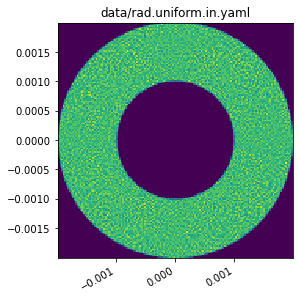

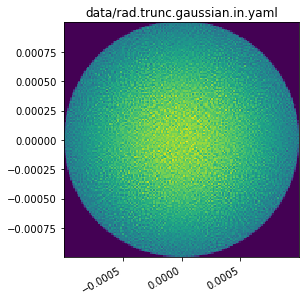

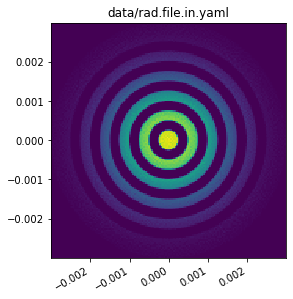

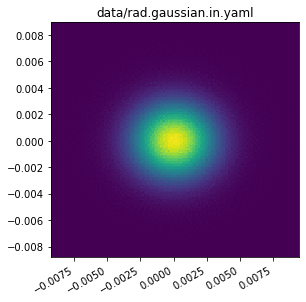

In [6]:
import VCC_ML

files = ['data/rad.uniform.in.yaml',
         'data/rad.trunc.gaussian.in.yaml',
         'data/rad.file.in.yaml',
         'data/rad.gaussian.in.yaml']
bins = 150

for file in files:
    gen = VCC_ML.create_beam(file)
    VCC_ML.show_histogram(gen, bins, figsize=[6.4, 4.8], title=file)

#### you can also use the marginal_plot function from pmd_beamphysics to plot axes other than x,y

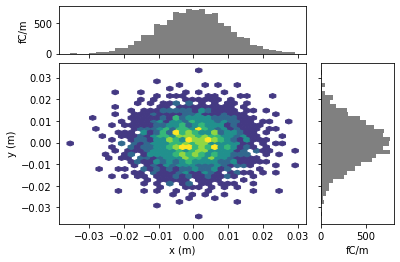

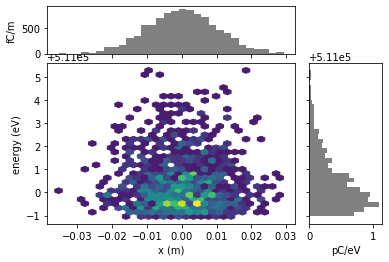

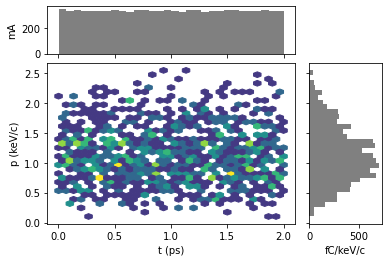

In [8]:
file = 'data/rad.gaussian.in.yaml'
beam = create_beam(file, parameters)

VCC_ML.use_marginal_plot(beam, key1='x', key2='y', bins=35)
VCC_ML.use_marginal_plot(beam, key1='x', key2='energy', bins=30)
VCC_ML.use_marginal_plot(beam, key1='t', key2='p', bins=30)

# 3. reducing and shaping a VCC image

<class 'numpy.ndarray'>
(50, 50)


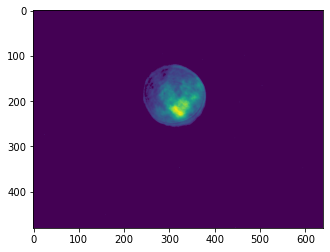

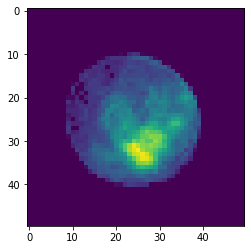

______________________________________



In [9]:
from VCC_ML import reduce_2dArray
from VCC_ML import SquareShape
from VCC_ML import get_dimensions
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

files1 = ["ProfMon-CAMR_IN20_186-2020-06-21-070829.mat"] # file used for first set of VCC image runs
files2 = ["ProfMon-CAMR_IN20_186-2020-06-21-084212.mat"]
directory = "data/"
new_images = []

for file in files2:
    data = sio.loadmat(directory+file, squeeze_me = False)["data"][0][0][1]
    # find out how big in real life the final image is
    reduced = reduce_2dArray(data, buffer = 120)
    square = SquareShape(reduced, shape = 50)
    new_images.append(square)
    
    print (type(square))
    print (np.shape(square))
    
    plt.imshow(data) #original VCC image
    plt.show()
    plt.imshow(square) #image after being reduced and set to 50x50
    plt.show()
    
    np.savetxt("data/ProfMon-CAMR_IN20_186-2020-06-21-084212.txt", reduced)
    
    print("______________________________________\n")